In [82]:
from dotenv import load_dotenv

In [83]:
load_dotenv()

True

In [84]:
import os
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [85]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI()

In [86]:
from langchain_openai import OpenAIEmbeddings


In [87]:
embeddings = OpenAIEmbeddings(
    model="text-embedding-3-large"
)

In [ ]:
embeddings.embed_query("hello how are you my firend?")

In [89]:
len(embeddings.embed_query("hello how are you my firend?"))

3072

In [90]:
url= "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [91]:
from langchain_community.document_loaders import WebBaseLoader

In [92]:
web_loader=WebBaseLoader(url)

In [93]:
data=web_loader.load()

In [ ]:
data

In [ ]:
data[0].metadata

In [96]:
len(data[0].metadata["description"])

1639

In [97]:
data[0].metadata["description"]

'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model 

In [ ]:
data[0].page_content

In [99]:
urls=[
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
]

In [100]:
docs=[WebBaseLoader(url).load() for url in urls]

In [ ]:
docs

In [102]:
docs_list=[item for sublist in docs for item in sublist]

In [ ]:
docs_list

In [104]:
from langchain_text_splitters import RecursiveCharacterTextSplitter 

In [105]:
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100,chunk_overlap=25)

In [106]:
doc_splits=text_splitter.split_documents(docs_list)

In [ ]:
doc_splits

In [108]:
from langchain_community.vectorstores import Chroma

In [109]:
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chrome",
    embedding=embeddings
)

In [110]:
retriever=vectorstore.as_retriever()

In [ ]:
retriever.invoke("what is agent and prompt?")

In [112]:
from langchain.tools.retriever import create_retriever_tool

In [113]:
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_blog_post",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
    )

In [114]:
tools=[retriever_tool]

In [115]:
from langgraph.prebuilt import ToolNode

In [116]:
retriever_node=ToolNode(tools)

In [117]:
retriever_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'retriever_blog_post': Tool(name='retriever_blog_post', description="Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.", args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001F4670E79C0>, retriever=VectorStoreRetriever(tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000001F466790E30>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_conten

In [118]:
from typing import Annotated,Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

In [119]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [120]:
from langchain_core.prompts import PromptTemplate

In [121]:
# def LLM_Decision_Maker(state:AgentState):
#     print("----CALL LLM_DECISION_MAKE----")
#     message=state["messages"]
    
#     if len(message)>1:
#         last_message=message[-1]
#         question=last_message.content
        
#         prompt=PromptTemplate(
#         template="""You are a helpful assistant whatever question has been asked to find out that in the given question and answer.
#                         Here is the question:{question}
#                         """,
#                         input_variables=["question"]
#                         )
#         chain=prompt | llm
#         response=chain.invoke({"question":question})
#         return {"messages":[response]}
#     else:
#         llm_with_tool=llm.bind_tools(tools)
#         response=llm_with_tool.invoke(message)
#         return {"messages":[response]}

In [122]:
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001F47BA6EE10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001F4760AB920>, root_client=<openai.OpenAI object at 0x000001F475F3E3C0>, root_async_client=<openai.AsyncOpenAI object at 0x000001F47BA6FEC0>, model_kwargs={}, openai_api_key=SecretStr('**********'))

In [123]:
tools

[Tool(name='retriever_blog_post', description="Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.", args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001F4670E79C0>, retriever=VectorStoreRetriever(tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000001F466790E30>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function 

In [124]:
llm_with_tool=llm.bind_tools(tools)

In [125]:
response=llm_with_tool.invoke("what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?")

In [126]:
response.content

''

In [127]:
response.tool_calls

[{'name': 'retriever_blog_post',
  'args': {'query': 'LLM Powered Autonomous Agents'},
  'id': 'call_Nrz05oOVgRQ0j4JhZY910oIx',
  'type': 'tool_call'},
 {'name': 'retriever_blog_post',
  'args': {'query': 'planning and reflection in autonomous agents'},
  'id': 'call_fNN9sj4ilLiAsWfY7taMzx7n',
  'type': 'tool_call'}]

In [128]:
def LLM_Decision_Maker(state:AgentState):
    print("----CALL LLM_DECISION_MAKE----")
    message=state["messages"]
    last_message=message[-1]
    question=last_message.content
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [129]:
from langchain_core.pydantic_v1 import BaseModel, Field

In [130]:
class grade(BaseModel):
    binary_score:str=Field(description="Relvance score 'yes' or 'no'")

In [131]:
from typing import Literal
#we use it for type of hinting

In [132]:
def grade_documents(state:AgentState)->Literal["Output Generator", "Query Rewriter"]:
    print("----CALLING GRADE FOR CHECKING RELEVANCY----")
    
    """bind pydantic class grade"""
    llm_with_structure_op=llm.with_structured_output(grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
     
    chain=prompt|llm_with_structure_op
     
     
    message=state['messages']
    
    last_message = message[-1]
    
    question = message[0].content
    
    docs = last_message.content
    
    scored_result=chain.invoke({"question": question, "context": docs})
    
    score=scored_result.binary_score
     
    if score=="yes":
        print("----DECISION: DOCS ARE RELEVANT----")
        return "generator"
    else:
        print("----DECISION: DOCS ARE NOT RELEVANT----")
        return "rewriter"

In [133]:
from langchain import hub

In [134]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [135]:
def generate(state:AgentState):
    print("----RAG OUTPUT GENERATE----")
    
    message=state["messages"]
    question=message[0].content
    
    last_message = message[-1]
    docs = last_message.content
    
    prompt=hub.pull("rlm/rag-prompt")
    
    rag_chain=prompt | llm
    
    response=rag_chain.invoke({"context": docs, "question": question})
    
    print(f"this is my response:{response}")
    
    return {"messages": [response]}

In [136]:
def rewrite(state:AgentState):
    print("----TRANSFORM QUERY----")
    message=state["messages"]
    
    question=message[0].content
    
    input= [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]

    response=llm.invoke(input)
    
    return {"messages": [response]}

In [137]:
from langgraph.graph import END, StateGraph, START

In [138]:
workflow=StateGraph(AgentState)

In [139]:
workflow.add_node("LLM Decision Maker",LLM_Decision_Maker)
workflow.add_node("Vector Retriever",retriever_node)
workflow.add_node("Output Generator",generate)
workflow.add_node("Query Rewriter",rewrite)

In [140]:
workflow.add_edge(START,"LLM Decision Maker")

In [141]:
from langgraph.prebuilt import tools_condition

In [142]:
workflow.add_conditional_edges("LLM Decision Maker",
                               tools_condition,
                               {"tools":"Vector Retriever",
                                END:END
                                })

In [154]:
workflow.add_conditional_edges("Vector Retriever",
                               grade_documents,
                               {"generator":"Output Generator",
                                "rewriter":"Query Rewriter"
                                })

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [155]:
workflow.add_edge("Output Generator",END)

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [156]:
workflow.add_edge("Query Rewriter","LLM Decision Maker")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [157]:
app=workflow.compile()

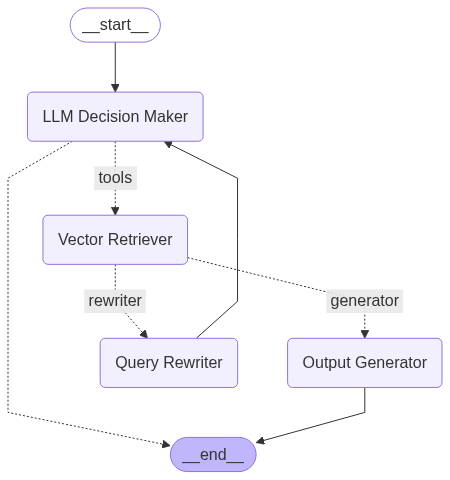

In [158]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [159]:
import warnings
warnings.filterwarnings("ignore")

In [160]:
app.invoke({"messages":["what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?"]})

----CALL LLM_DECISION_MAKE----
----CALLING GRADE FOR CHECKING RELEVANCY----
----DECISION: DOCS ARE RELEVANT----
----RAG OUTPUT GENERATE----
this is my response:content='LLM Powered Autonomous Agents use LLM along with memory, planning, and reflection mechanisms to enable agents to behave based on past experiences and interact with other agents. These agents are designed to have planning and reflection capabilities, allowing them to make decisions and learn from their past interactions in order to improve their behavior. Langchain is a decentralized language AI network that could potentially be incorporated into autonomous agents to enhance their language processing capabilities.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 296, 'total_tokens': 380, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_

{'messages': [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='7570a0fc-df49-4b9d-8d92-5e20bf27ad14'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8FKfcPORwg5R8CCyheFUHYJ9', 'function': {'arguments': '{"query": "LLM Powered Autonomous Agents"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_DbJ3J0XdAwX3ZEhEj0A6csC1', 'function': {'arguments': '{"query": "planning and reflection in LLM Powered Autonomous Agents"}', 'name': 'retriever_blog_post'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 163, 'total_tokens': 225, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tok

In [161]:
app.invoke({"messages":["hi how are you gpt?"]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='hi how are you gpt?', additional_kwargs={}, response_metadata={}, id='0fd77c50-5328-4e15-981b-2c4293f2f8c2'),
  AIMessage(content="Hello! I'm here and ready to assist you. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 145, 'total_tokens': 164, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BnyZatnWFxZivfkmiZgjOCdGqCaNU', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--cda7bd5b-fc0e-4c2e-8dc2-7691c7e61d0d-0', usage_metadata={'input_tokens': 145, 'output_tokens': 19, 'total_tokens': 164, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}

In [162]:
app.invoke({"messages":["what is a capital of india?"]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='what is a capital of india?', additional_kwargs={}, response_metadata={}, id='37a88b3c-3d47-4f2b-8979-89d9f8e2dc9e'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 145, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BnyZdrcxduVEH7DJazx6ZA32WRhem', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--91c3996b-221d-40cf-bc5d-73545461cb3d-0', usage_metadata={'input_tokens': 145, 'output_tokens': 9, 'total_tokens': 154, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [163]:
question="can you explain me what is a task decomposition and why Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks?"

In [164]:
app.invoke({"messages":[question]})

----CALL LLM_DECISION_MAKE----
----CALLING GRADE FOR CHECKING RELEVANCY----
----DECISION: DOCS ARE RELEVANT----
----RAG OUTPUT GENERATE----
this is my response:content='Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks because it instructs models to "think step by step." This allows for the decomposition of hard tasks into smaller, manageable steps, improving overall task performance. CoT sheds light on the model\'s thinking process by transforming big tasks into multiple simpler tasks.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 399, 'total_tokens': 477, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-B

{'messages': [HumanMessage(content='can you explain me what is a task decomposition and why Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks?', additional_kwargs={}, response_metadata={}, id='39b1a3e3-ec23-4d9d-8c50-5d1b6ab2d752'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mjWcsTzbaGWtHITV9QQSwX3A', 'function': {'arguments': '{"query":"task decomposition"}', 'name': 'retriever_blog_post'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 178, 'total_tokens': 196, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BnyZjXdRyBciTKt4b0SjqfUp9CaAb', 'service_tier': 'default', 'finish_

In [ ]:
query:who is sunny?

vdb: relevant doc? NO

query-> rewriter

query: who is sunny the sunny who is geneai eng and mentor and create yt video?
vdb: relevant doc? YES